In [1]:
import pandas as pd
import lifelines as ll
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
TENURES = pd.read_csv('categorized/tenures-summarized-categorized.csv')

In [4]:
TENURES.head()

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_truncated,ending
0,kruger|01|03|ATL,L. Kruger,ATL,3,191,69,122,2001,2003,True,fired
1,stotts|03|04|ATL,T. Stotts,ATL,2,137,52,85,2003,2004,False,fired
2,woodson|05|10|ATL,M. Woodson,ATL,6,492,206,286,2005,2010,False,fired
3,drew|11|13|ATL,L. Drew,ATL,3,230,128,102,2011,2013,False,fired
4,budenholzer|14|17|ATL,M. Budenholzer,ATL,4,328,189,139,2014,2017,False,NaN


In [5]:
TENURES.ending.value_counts()

fired               112
interim only         39
resigned             26
contract expired      2
traded                2
retired               2
mutual                2
died                  1
Name: ending, dtype: int64

In [6]:
tenures = TENURES[TENURES.ending != 'interim only']

In [7]:
death_event = ['fired', 'contract expired', 'mutual']

In [8]:
tenures['death'] = (tenures.ending.isin(death_event) * 1)

/home/ryan/.virtualenvs/coaching-survival/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
tenures.sample(5)

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_truncated,ending,death
170,mcmillan|06|12|POR,N. McMillan,POR,7,535,266,269,2006,2012,False,fired,1
178,smart|12|13|SAC,K. Smart,SAC,2,141,48,93,2012,2013,False,fired,1
150,brown|01|03|PHI,L. Brown,PHI,3,246,147,99,2001,2003,True,resigned,0
99,skiles|09|13|MIL,S. Skiles,MIL,5,344,162,182,2009,2013,False,mutual,1
57,cowens|01|02|GSW,D. Cowens,GSW,2,105,25,80,2001,2002,True,fired,1


In [10]:
kmf = ll.KaplanMeierFitter()

In [11]:
kmf.fit(tenures.games, event_observed=tenures.death)

<lifelines.KaplanMeierFitter: fitted with 177 observations, 61 censored>

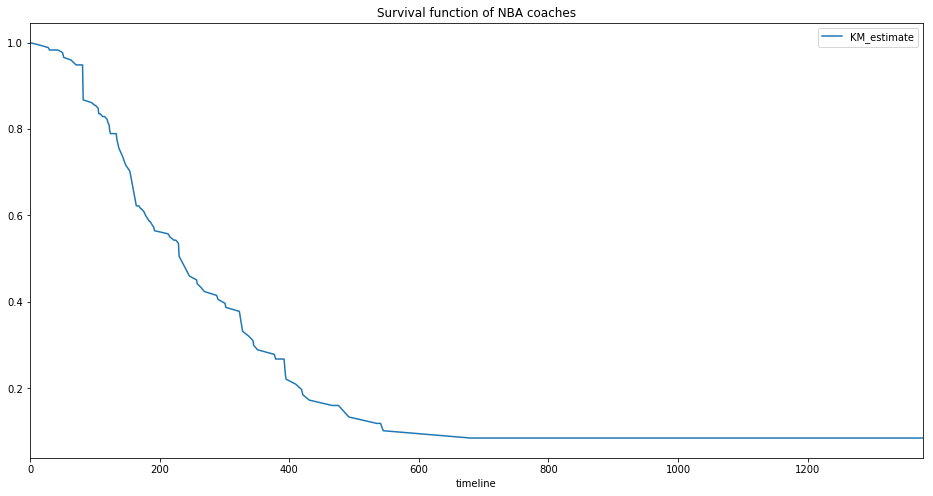

In [12]:
kmf.survival_function_.plot(figsize=(16,8))
plt.title('Survival function of NBA coaches');

Text(0.5,1,u'Survival function of NBA coaches')

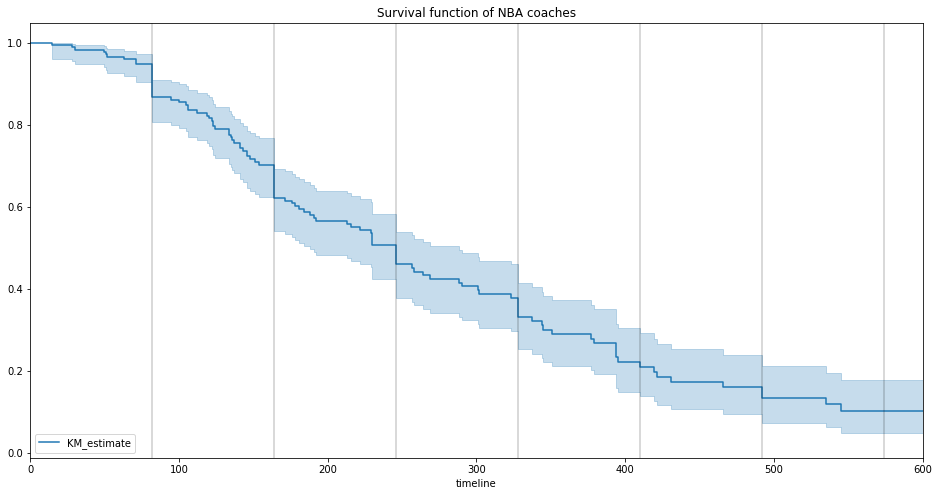

In [13]:
kmf.plot(figsize=(16,8))
[plt.axvline(g, c='black', alpha=0.2) for g in range(82, 82*20, 82)]
plt.xlim(0, 600)
plt.title('Survival function of NBA coaches')

In [17]:
POC = pd.read_csv('categorized/coach-list-poc.csv')

In [18]:
POC.head()

,coach,franchises,poc,note
0,T. Porter,PHO|MIL,yes,NaN
1,T. Lue,CLE,yes,NaN
2,T. Corbin,SAC|UTA,yes,NaN
3,T. Brown,NJNBRK,yes,NaN
4,S. Vincent,CHARBH,yes,NaN


In [19]:
tenures_poc = pd.merge(tenures, POC[['coach','poc']], how='left')

In [20]:
tenures_poc.poc.isnull().sum()

0

In [21]:
tenures_poc.head()

,slug,coach,franchise,seasons,games,wins,losses,min_year,max_year,left_truncated,ending,death,poc
0,kruger|01|03|ATL,L. Kruger,ATL,3,191,69,122,2001,2003,True,fired,1,no
1,stotts|03|04|ATL,T. Stotts,ATL,2,137,52,85,2003,2004,False,fired,1,no
2,woodson|05|10|ATL,M. Woodson,ATL,6,492,206,286,2005,2010,False,fired,1,yes
3,drew|11|13|ATL,L. Drew,ATL,3,230,128,102,2011,2013,False,fired,1,yes
4,budenholzer|14|17|ATL,M. Budenholzer,ATL,4,328,189,139,2014,2017,False,NaN,0,no


(0, 600)

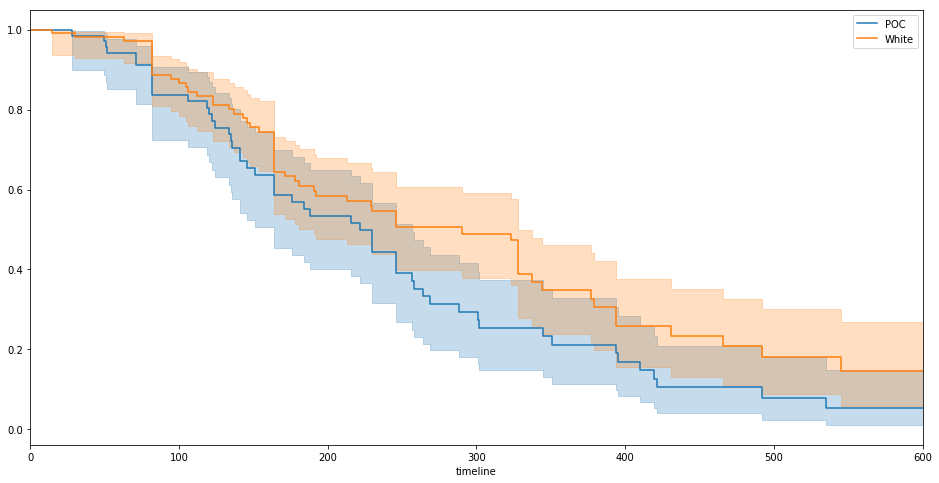

In [22]:
plt.figure(figsize=(16,8))
ax = plt.subplot(111)

ispoc = (tenures_poc['poc'] == 'yes')

kmf.fit(tenures_poc[ispoc].games, event_observed=tenures_poc[ispoc].death, label="POC")
kmf.plot(ax=ax)
kmf.fit(tenures_poc[~ispoc].games, event_observed=tenures_poc[~ispoc].death, label="White")
kmf.plot(ax=ax)

plt.xlim(0,600)